In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# averageRating

In [ ]:
# reading the dataset
train_df = pd.read_csv('train11.csv')
test_df = pd.read_csv("test3.csv")

In [ ]:
#splitting the dataset into training and testing
X_train = train_df.drop(['originalTitle','averageRating','ratingCount'], axis = 1)
y_train = train_df['averageRating']
X_test = test_df.drop(['originalTitle','averageRating','ratingCount'], axis = 1)
y_test = test_df['averageRating']

In [ ]:
# Train initial Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions and evaluate initial performance
y_pred = lr.predict(X_test)
print("Initial Linear Regression Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

Initial Linear Regression Performance:
RMSE: 1.308587010439879
R^2 Score: 0.09849314914868723


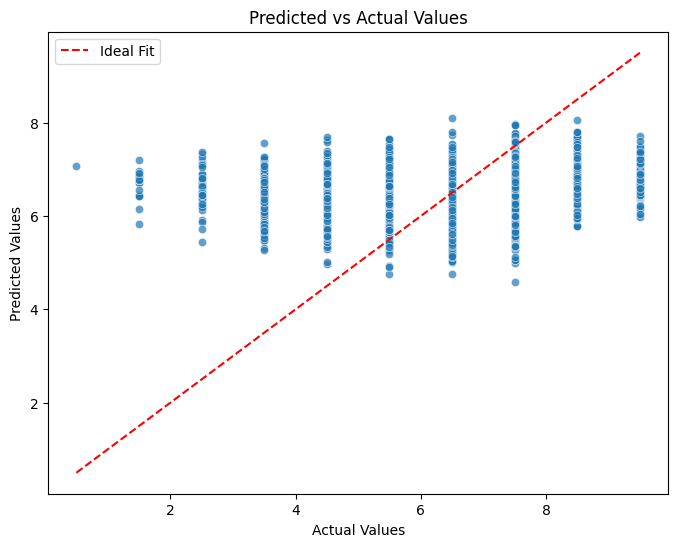

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predicted vs Actual Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.title("Predicted vs Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()


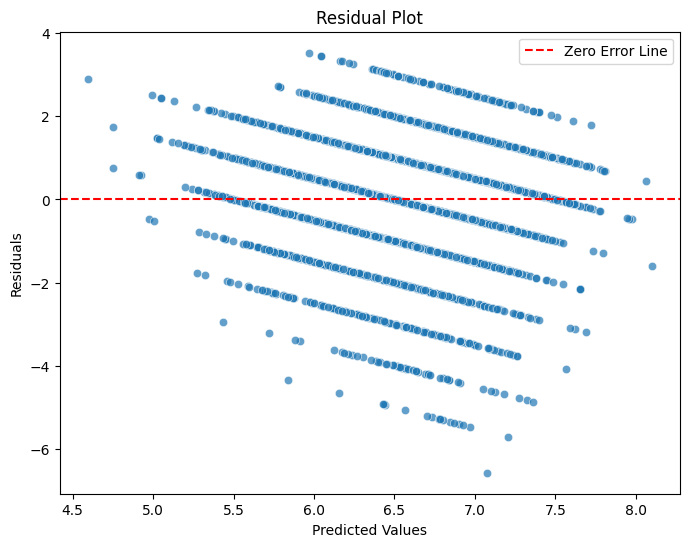

In [ ]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(0, color='r', linestyle='--', label="Zero Error Line")
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend()
plt.show()


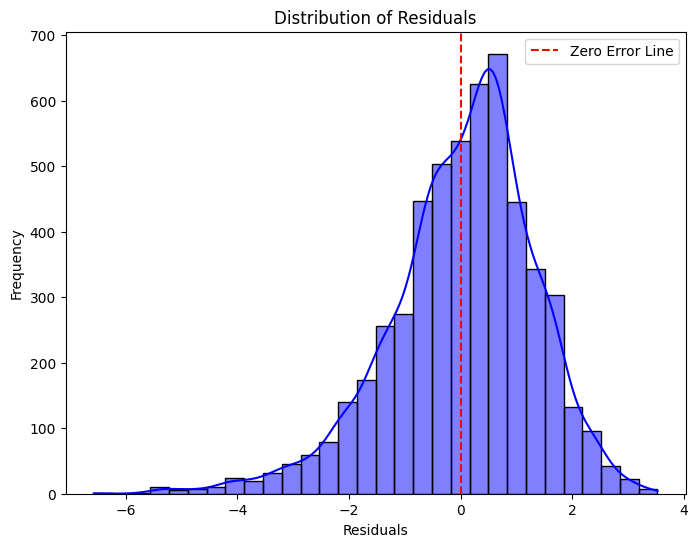

In [ ]:
# Distribution of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.axvline(0, color='r', linestyle='--', label="Zero Error Line")
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()
plt.show()

C:\Users\tanya\AppData\Local\Temp\ipykernel_7736\1369998580.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance, palette="viridis")


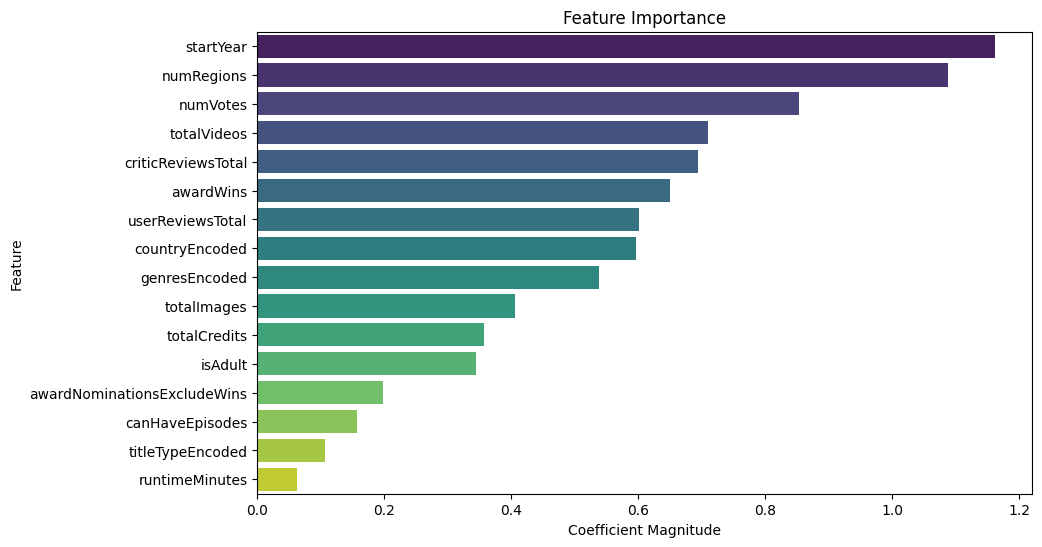

In [ ]:
# Feature Importance Bar Plot
importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.abs(lr.coef_)
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance, palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature")
plt.show()

In [ ]:
#getting the parameters
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [ ]:
#fine tuning the model using GridSearchCV
param_space = {'copy_X': [True,False],
               'fit_intercept': [True,False],
               'n_jobs': [1,5,10,15,None],
               'positive': [True,False]}

grid_search = GridSearchCV(lr, param_space, cv=5)

grid_search.fit(X_train, y_train)

# Parameter which gives the best results
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Accuracy of the model after using best parameters
print(f"Best Score: {grid_search.best_score_}")


Best Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}
Best Score: 0.10256639359258972


In [ ]:
# measuring accuracy using grid search cv parameters
lr = LinearRegression(copy_X = True, fit_intercept= True, positive= False, n_jobs =1)
lr.fit(X_train, y_train)

# Make predictions and evaluate initial performance
y_pred = lr.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

RMSE: 1.308587010439879
R^2 Score: 0.09849314914868723


In [ ]:
param_space = {'copy_X': [True,False],
               'fit_intercept': [True,False],
               'n_jobs': [1,5,10,15,None],
               'positive': [True,False]}

random_search = RandomizedSearchCV(lr, param_space, n_iter=40, cv=5)
random_search.fit(X_train, y_train)

# Parameter which gives the best results
print(f"Best Hyperparameters: {random_search.best_params_}")

# Accuracy of the model after using best parameters
print(f"Best Score: {random_search.best_score_}")

Best Hyperparameters: {'positive': False, 'n_jobs': 1, 'fit_intercept': True, 'copy_X': True}
Best Score: 0.10256639359258972


In [ ]:
# measuring accuracy using randomized search cv parameters
lr = LinearRegression(copy_X = True, fit_intercept= True, positive= False, n_jobs =1)
lr.fit(X_train, y_train)

# Make predictions and evaluate initial performance
y_pred = lr.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

RMSE: 1.308587010439879
R^2 Score: 0.09849314914868723


In [ ]:
# Feature importance for Linear (non-zero coefficients)
linear_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": lr.coef_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance (Linear Regression):")
print(linear_importance)


Feature Importance (Lasso Regression):
                        Feature  Importance
0                     startYear    1.162696
3                      numVotes    0.853107
2                     awardWins    0.650824
15               countryEncoded    0.596000
14                genresEncoded    0.538955
4                   totalImages    0.405755
6                  totalCredits    0.357100
8   awardNominationsExcludeWins    0.198487
9               canHaveEpisodes    0.157754
1                runtimeMinutes   -0.061880
13             titleTypeEncoded   -0.105976
10                      isAdult   -0.343946
12             userReviewsTotal   -0.601066
7            criticReviewsTotal   -0.694390
5                   totalVideos   -0.710699
11                   numRegions   -1.088475


In [ ]:
#removing the least important features
X_train = train_df.drop(['originalTitle','averageRating','ratingCount','totalCredits','awardNominationsExcludeWins','canHaveEpisodes','runtimeMinutes','titleTypeEncoded','isAdult'], axis = 1)
y_train = train_df['averageRating']
X_test = test_df.drop(['originalTitle','averageRating','ratingCount','totalCredits','awardNominationsExcludeWins','canHaveEpisodes','runtimeMinutes','titleTypeEncoded','isAdult'], axis = 1)
y_test = test_df['averageRating']

In [ ]:
# measuring accuracy after removing less important features
lr = LinearRegression(copy_X = True, fit_intercept= True, positive= False, n_jobs =1)
lr.fit(X_train, y_train)

# Make predictions and evaluate initial performance
y_pred = lr.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

RMSE: 1.3124186574881422
R^2 Score: 0.09320605214257549


# numVotes

In [ ]:
# reading the dataset
train_df = pd.read_csv('train9.csv')
test_df = pd.read_csv("test4.csv")

In [ ]:
#splitting the dataset into training and testing
X_train = train_df.drop(['originalTitle','numVotes','ratingCount'], axis = 1)
y_train = train_df['numVotes']
X_test = test_df.drop(['originalTitle','numVotes','ratingCount'], axis = 1)
y_test = test_df['numVotes']

In [ ]:
# Train initial Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions and evaluate initial performance
y_pred = lr.predict(X_test)
print("Initial Linear Regression Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

Initial Linear Regression Performance:
RMSE: 0.10936221335474876
R^2 Score: 0.6632991726524416


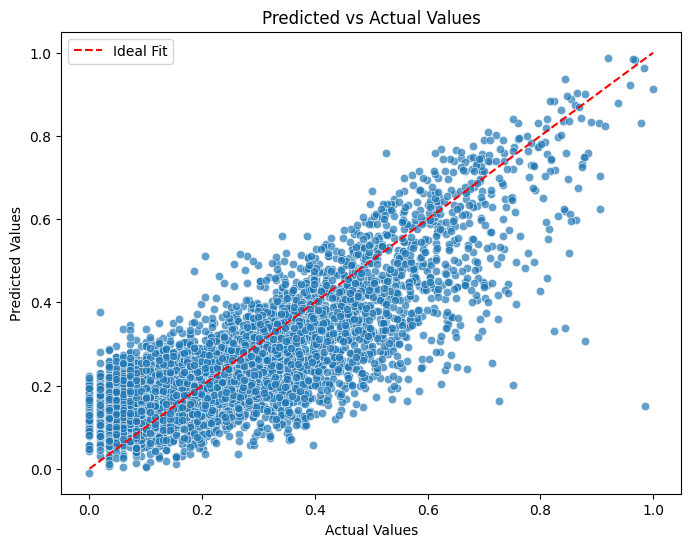

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predicted vs Actual Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.title("Predicted vs Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

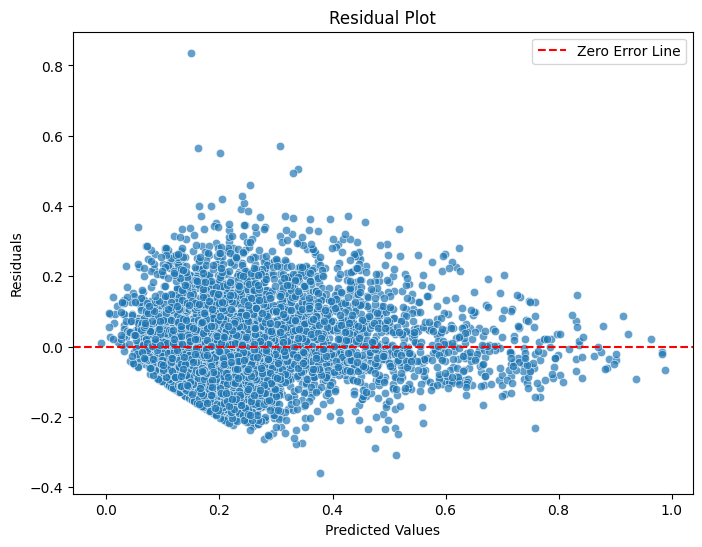

In [ ]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(0, color='r', linestyle='--', label="Zero Error Line")
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend()
plt.show()

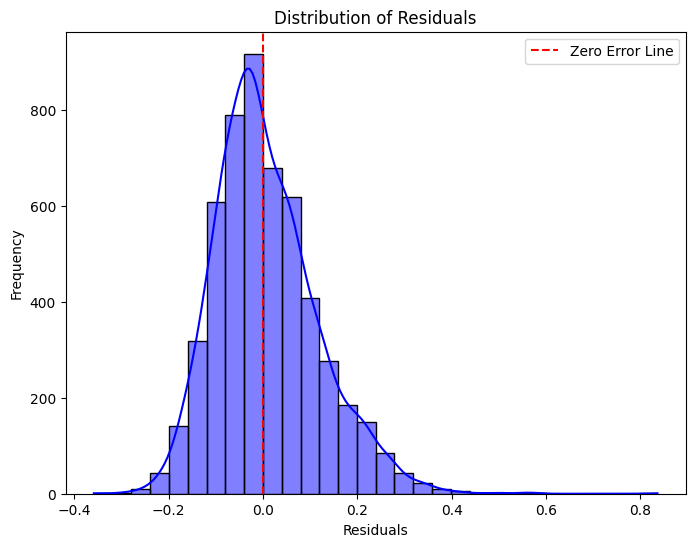

In [ ]:
# Distribution of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.axvline(0, color='r', linestyle='--', label="Zero Error Line")
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [ ]:
#getting the parameters
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [ ]:
#fine tuning the model using GridSearchCV
param_space = {'copy_X': [True,False],
               'fit_intercept': [True,False],
               'n_jobs': [1,5,10,15,None],
               'positive': [True,False]}

grid_search = GridSearchCV(lr, param_space, cv=5)

grid_search.fit(X_train, y_train)

# Parameter which gives the best results
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Accuracy of the model after using best parameters
print(f"Best Score: {grid_search.best_score_}")


Best Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}
Best Score: 0.6591836872344389


In [ ]:
# measuring accuracy using grid search cv parameters
lr = LinearRegression(copy_X = True, fit_intercept= True, positive= False, n_jobs =1)
lr.fit(X_train, y_train)

# Make predictions and evaluate initial performance
y_pred = lr.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

RMSE: 0.10936221335474876
R^2 Score: 0.6632991726524416


In [ ]:
#fine tuning randomisedSearchCV
param_space = {'copy_X': [True,False],
               'fit_intercept': [True,False],
               'n_jobs': [1,5,10,15,None],
               'positive': [True,False]}

random_search = RandomizedSearchCV(lr, param_space, n_iter=40, cv=5)
random_search.fit(X_train, y_train)

# Parameter which gives the best results
print(f"Best Hyperparameters: {random_search.best_params_}")

# Accuracy of the model after using best parameters
print(f"Best Score: {random_search.best_score_}")

Best Hyperparameters: {'positive': False, 'n_jobs': 1, 'fit_intercept': True, 'copy_X': True}
Best Score: 0.6591836872344389


In [ ]:
# measuring accuracy using randomized search cv parameters
lr = LinearRegression(copy_X = True, fit_intercept= True, positive= False, n_jobs =1)
lr.fit(X_train, y_train)

# Make predictions and evaluate initial performance
y_pred = lr.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

RMSE: 0.10936221335474876
R^2 Score: 0.6632991726524416


In [ ]:
# Feature importance for Linear (non-zero coefficients)
linear_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": lr.coef_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance (Linear Regression):")
print(linear_importance)


Feature Importance (Lasso Regression):
                        Feature  Importance
11             userReviewsTotal    0.451459
5                  totalCredits    0.216047
6            criticReviewsTotal    0.172871
3                   totalImages    0.133047
12                averageRating    0.058261
14                genresEncoded    0.047220
15               countryEncoded    0.033137
9                       isAdult    0.024202
10                   numRegions    0.018091
2                     awardWins    0.016074
7   awardNominationsExcludeWins    0.011330
4                   totalVideos    0.008139
13             titleTypeEncoded    0.000305
0                     startYear   -0.000151
1                runtimeMinutes   -0.019758
8               canHaveEpisodes   -0.019998


In [ ]:
#removing the least important features
X_train = train_df.drop(['originalTitle','averageRating','ratingCount','awardNominationsExcludeWins','canHaveEpisodes','runtimeMinutes','titleTypeEncoded','isAdult','numRegions','awardWins','totalVideos','startYear'], axis = 1)
y_train = train_df['numVotes']
X_test = test_df.drop(['originalTitle','averageRating','ratingCount','awardNominationsExcludeWins','canHaveEpisodes','runtimeMinutes','titleTypeEncoded','isAdult','numRegions','awardWins','totalVideos','startYear'], axis = 1)
y_test = test_df['numVotes']

In [ ]:
# measuring accuracy after removing less important features
lr = LinearRegression(copy_X = True, fit_intercept= True, positive= False, n_jobs =1)
lr.fit(X_train, y_train)

# Make predictions and evaluate initial performance
y_pred = lr.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

RMSE: 0.1021101284056743
R^2 Score: 0.04772737673386329


# totalCredits

In [ ]:
# reading the dataset
train_df = pd.read_csv('train9.csv')
test_df = pd.read_csv("test4.csv")

In [ ]:
#splitting the dataset into training and testing
X_train = train_df.drop(['originalTitle','totalCredits','ratingCount'], axis = 1)
y_train = train_df['totalCredits']
X_test = test_df.drop(['originalTitle','totalCredits','ratingCount'], axis = 1)
y_test = test_df['totalCredits']

In [ ]:
# Train initial Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions and evaluate initial performance
y_pred = lr.predict(X_test)
print("Initial Linear Regression Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

Initial Linear Regression Performance:
RMSE: 0.13522841524192053
R^2 Score: 0.3346293828294663


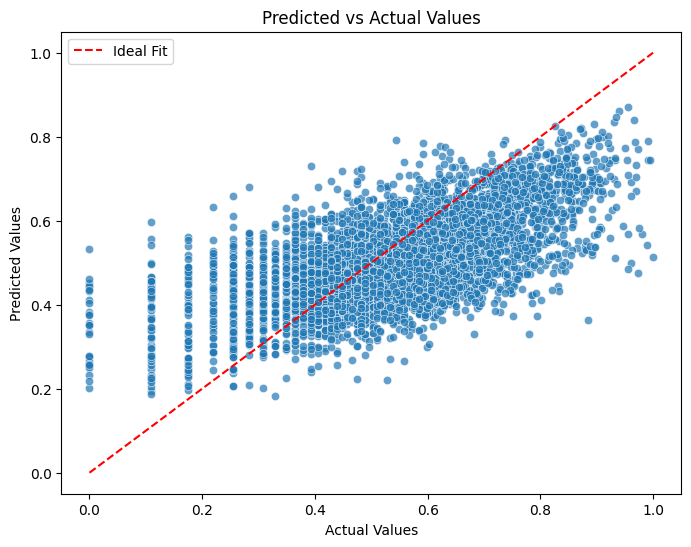

In [ ]:
#visulazing predicted vs actual
import matplotlib.pyplot as plt
import seaborn as sns

# Predicted vs Actual Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.title("Predicted vs Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

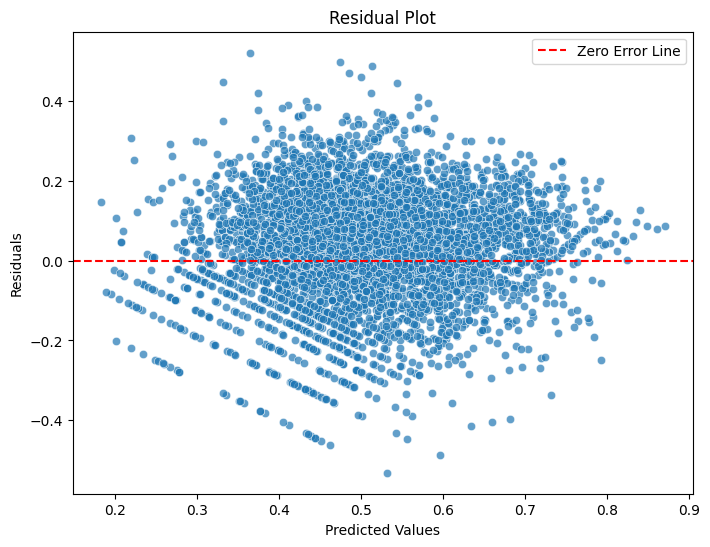

In [ ]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(0, color='r', linestyle='--', label="Zero Error Line")
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend()
plt.show()

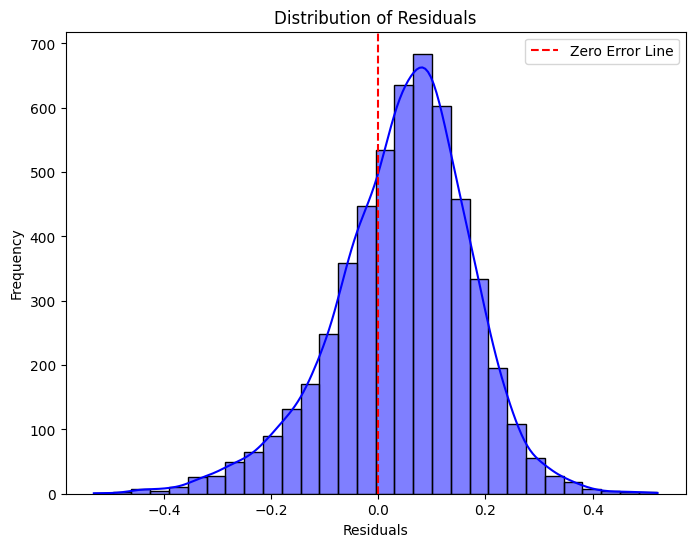

In [ ]:
# Distribution of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.axvline(0, color='r', linestyle='--', label="Zero Error Line")
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [ ]:
#getting the parameters
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [ ]:
#fine tuning the model using GridSearchCV
param_space = {'copy_X': [True,False],
               'fit_intercept': [True,False],
               'n_jobs': [1,5,10,15,None],
               'positive': [True,False]}

grid_search = GridSearchCV(lr, param_space, cv=5)

grid_search.fit(X_train, y_train)

# Parameter which gives the best results
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Accuracy of the model after using best parameters
print(f"Best Score: {grid_search.best_score_}")

Best Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}
Best Score: 0.383199661050165


In [ ]:
# measuring accuracy using grid search cv parameters
lr = LinearRegression(copy_X = True, fit_intercept= True, positive= False, n_jobs =1)
lr.fit(X_train, y_train)

# Make predictions and evaluate initial performance
y_pred = lr.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

RMSE: 0.13522841524192053
R^2 Score: 0.3346293828294663


In [ ]:
#fine-tuning randomizedSearchCV
param_space = {'copy_X': [True,False],
               'fit_intercept': [True,False],
               'n_jobs': [1,5,10,15,None],
               'positive': [True,False]}

random_search = RandomizedSearchCV(lr, param_space, n_iter=40, cv=5)
random_search.fit(X_train, y_train)

# Parameter which gives the best results
print(f"Best Hyperparameters: {random_search.best_params_}")

# Accuracy of the model after using best parameters
print(f"Best Score: {random_search.best_score_}")

Best Hyperparameters: {'positive': False, 'n_jobs': 1, 'fit_intercept': True, 'copy_X': True}
Best Score: 0.383199661050165


In [ ]:
# measuring accuracy using randomized search cv parameters
lr = LinearRegression(copy_X = True, fit_intercept= True, positive= False, n_jobs =1)
lr.fit(X_train, y_train)

# Make predictions and evaluate initial performance
y_pred = lr.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

RMSE: 0.13522841524192053
R^2 Score: 0.3346293828294663


In [ ]:
# Feature importance for Linear (non-zero coefficients)
linear_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": lr.coef_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance (Linear Regression):")
print(linear_importance)


Feature Importance (Linear Regression):
                        Feature  Importance
3                      numVotes    0.322128
0                     startYear    0.207257
1                runtimeMinutes    0.163281
13             titleTypeEncoded    0.163124
15               countryEncoded    0.104074
8               canHaveEpisodes    0.095869
4                   totalImages    0.087206
14                genresEncoded    0.079555
12                averageRating    0.055052
7   awardNominationsExcludeWins    0.033528
10                   numRegions    0.019632
6            criticReviewsTotal   -0.007934
5                   totalVideos   -0.021563
9                       isAdult   -0.023414
11             userReviewsTotal   -0.039995
2                     awardWins   -0.042949


In [ ]:
#removing the least important features
X_train = train_df.drop(['originalTitle','averageRating','ratingCount','totalCredits','awardNominationsExcludeWins','canHaveEpisodes','totalImages','genresEncoded','numRegions','criticReviewsTotal','totalVideos','runtimeMinutes','titleTypeEncoded','isAdult'], axis = 1)
y_train = train_df['totalCredits']
X_test = test_df.drop(['originalTitle','averageRating','ratingCount','totalCredits','awardNominationsExcludeWins','canHaveEpisodes','totalImages','genresEncoded','numRegions','criticReviewsTotal','totalVideos','runtimeMinutes','titleTypeEncoded','isAdult'], axis = 1)
y_test = test_df['totalCredits']

In [ ]:
# measuring accuracy after removing less important features
lr = LinearRegression(copy_X = True, fit_intercept= True, positive= False, n_jobs =1)
lr.fit(X_train, y_train)

# Make predictions and evaluate initial performance
y_pred = lr.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

RMSE: 0.14534448819697332
R^2 Score: 0.23135671873425723
